In [3]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.random as rnd
import scipy.stats as stats

## Geometric Dist

In [22]:
n = 10000
rnd.seed(0)
Us = rnd.rand(n)


def getGeometric(Us, p):
    t = np.log(1 - Us) / np.log(1 - p)
    Xs = np.ceil(t)
    return Xs
Xs = getGeometric(Us, 0.25)
print(Xs)

[3. 5. 4. ... 5. 1. 6.]


## 6 Point Dist

(array([0.1433, 0.109 , 0.1273, 0.0584, 0.2562, 0.3058]),
 array([0., 1., 2., 3., 4., 5., 6.]),
 <BarContainer object of 6 artists>)

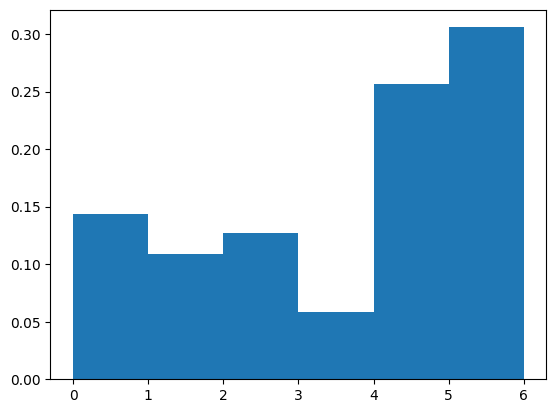

In [26]:
def directCride(ps, n):
    # Does not include a binary  seacrch
    Fs = np.cumsum(ps)
    Us = rnd.rand(n)
    Xs = np.zeros(n)
    for i in range(len(Us)):
        Xs[i] = np.argmax(Us[i] < Fs)
    return Xs

ps = np.array([7/48, 5/48, 1/8, 1/16, 1/4, 5/16])
Xs_dc = directCride(ps, 10000)
plt.hist(Xs_dc, bins=6, range=(0, 6), density=True)

## Rejection Method

0.3126 0.2508 0.0662 0.1243 0.1018 0.1443


(array([0.1443, 0.1018, 0.1243, 0.0662, 0.2508, 0.3126]),
 array([1., 2., 3., 4., 5., 6., 7.]),
 <BarContainer object of 6 artists>)

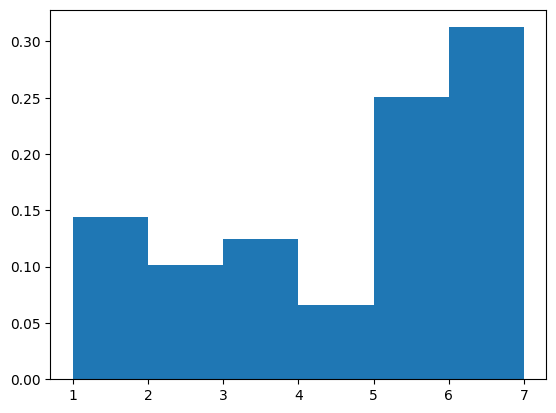

In [42]:
def rejectionMethod(ps, n):
    c = np.max(ps)
    Xs = np.zeros(n)
    k = len(ps)
    count = 0
    while count < n:
        U1 = rnd.rand()
        I = int(np.floor(k * U1))
        U2 = rnd.rand()
        if U2 <= ps[I] / c:
            Xs[count] = I
            count += 1

    return Xs + 1
Xs_reject = rejectionMethod(ps, n)
plt.hist(Xs_reject, bins=6,range = (1,7),  density=True)


## Alias

[2. 5. 5. ... 2. 5. 5.]


(array([0.1429, 0.1023, 0.128 , 0.0597, 0.251 , 0.3161]),
 array([0., 1., 2., 3., 4., 5., 6.]),
 <BarContainer object of 6 artists>)

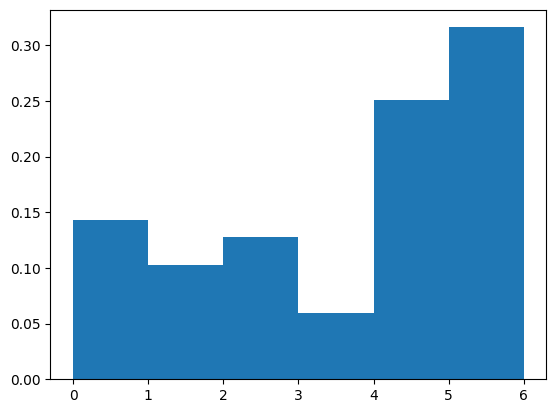

In [74]:
def getFL(ps):
    eps = 10e-5
    k = len(ps)
    L = [i for i in range(0,k)]
    Fs = k * ps
    G = np.where(Fs >= 1, True, False)
    S = np.where(Fs <= 1, True, False)
    G = np.where(G)[0]
    S = np.where(S)[0]
    while len(S) > 0:
        i = G[0]
        j = S[0]
        S = np.delete(S, 0)
        L[j] = i
        Fs[i] -= 1 - Fs[j]
        if Fs[i] < 1 - eps:
            G = np.delete(G, 0)
            S = np.append(S, i)
    return L, Fs

def alias(ps, n):
    k = len(ps)
    L, Fs = getFL(ps)
    Us = rnd.rand(n)
    Is = np.floor(k * Us)
    Xs = np.zeros(n)
    for n in range(len(Is)):
        I = int(Is[n])
        U2 = rnd.rand()
        if U2 <= Fs[I]:
            Xs[n] = I
        else:
            Xs[n] = L[I]
    return Xs
Xs_alias = alias(ps, n)
print(Xs_alias)
plt.hist(Xs_alias, range = (0, 6), density=True, bins = 6)

## Testing

### Kolmogorov Smirnov

# Continous Variables

## Exponential Insert PDF

In [ ]:
def generateExponential(lam, n = 10000):
    Us = rnd.rand(n)
    return - np.log(Us) / lam 

Xs_exp = generateExponential(0.5)
print(Xs)
plt.hist(Xs, bins = 20, density= True)

## Normal (Box Mueller)

[4.05385479e-05 4.19619336e-05 4.34324789e-05 4.49516422e-05
 4.65209236e-05 4.81418656e-05 4.98160540e-05 5.15451197e-05
 5.33307390e-05 5.51746353e-05 5.70785803e-05 5.90443946e-05
 6.10739496e-05 6.31691683e-05 6.53320270e-05 6.75645561e-05
 6.98688416e-05 7.22470268e-05 7.47013131e-05 7.72339619e-05
 7.98472957e-05 8.25436998e-05 8.53256236e-05 8.81955822e-05
 9.11561581e-05 9.42100024e-05 9.73598369e-05 1.00608455e-04
 1.03958725e-04 1.07413590e-04 1.10976069e-04 1.14649262e-04
 1.18436349e-04 1.22340592e-04 1.26365339e-04 1.30514023e-04
 1.34790166e-04 1.39197379e-04 1.43739368e-04 1.48419931e-04
 1.53242962e-04 1.58212456e-04 1.63332506e-04 1.68607311e-04
 1.74041172e-04 1.79638498e-04 1.85403810e-04 1.91341737e-04
 1.97457026e-04 2.03754539e-04 2.10239257e-04 2.16916284e-04
 2.23790846e-04 2.30868298e-04 2.38154123e-04 2.45653938e-04
 2.53373491e-04 2.61318672e-04 2.69495507e-04 2.77910168e-04
 2.86568972e-04 2.95478383e-04 3.04645021e-04 3.14075656e-04
 3.23777218e-04 3.337567

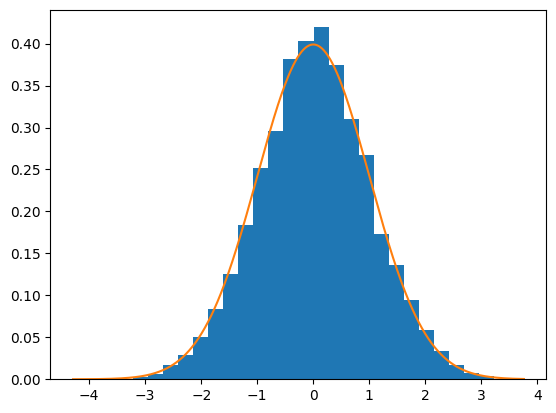

In [175]:
def unifab(a,b, n = 10000):
    Us = rnd.rand(n)
    Xs = a + (b - a) * Us
    return Xs

def generateTrig(n = 10000):
    Vs1 = np.zeros(n)
    Vs2 = Vs1
    for i in range(len(Vs1)):
        while True:
            V1 = unifab(-1, 1, 1)
            V2 = unifab(-1, 1, 1)
            Rsq = V1**2 + V2**2
            if  Rsq <= 1:
                break
        Vs1[i] = V1 / np.sqrt(Rsq)
        Vs2[i] = V2 / np.sqrt(Rsq)
    return Vs1 , Vs2 

def generateNorm(mu = 0, sigma = 1, n = 10000):
    cos, sin = generateTrig(int(np.ceil(n / 2)))
    U1s = rnd.rand(int(np.ceil(n / 2)))
    cs = np.sqrt(-2 * np.log(U1s))
    Z1s = cs * cos
    Z2s = cs * sin
    Zs = np.append(Z1s, Z2s)
    Zs = Zs[:n-1]
    return Zs * sigma + mu

mu = 0
sigma = 1
Zs = generateNorm(mu,sigma, 10000)
xs = np.linspace(np.min(Zs), np.max(Zs), 1000)
ys = stats.norm.pdf(xs, loc = mu, scale = sigma)
print(ys)
plt.hist(Zs, bins = 30, density= True)
plt.plot(xs, ys)
plt.show()

## Pareto

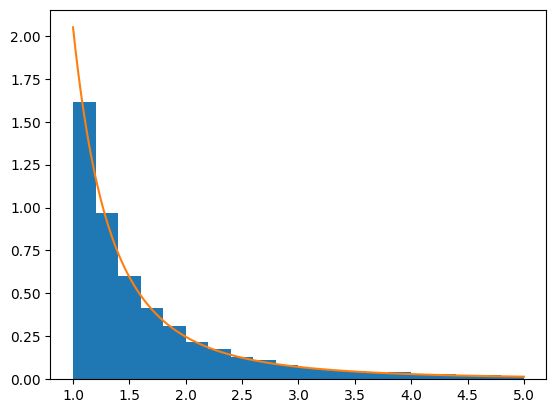

In [122]:
def generatePareto(k, beta = 1, n = 10000):
    Us = rnd.rand(n)
    return beta * (Us**(-1/k)) 
k = 2.05
Xs_Pareto = generatePareto(k)
cut = 5
plt.hist(Xs_Pareto[Xs_Pareto < cut], bins = 20, density= True)
xs = np.linspace(1, cut, 1000)
ys = k * 1**k / (xs**(k+1))
plt.plot(xs, ys)
plt.show()

## Applying Kolmogorov-Smirnov Test for the Three

# Exercise 2
Comparing mean and variance for the Pareto distribution

In [170]:
ks = [2.01, 2.05, 2.5, 3, 4]
beta = 1
for k in ks:
    xs = generatePareto(k, beta, 100000)
    print(f"For k = {k}:")
    print(f"Simulated: Mean = {np.mean(xs):.4f}, Variance = {np.var(xs):.4f}")
    # Analytical
    analytical_mean = beta * k / (k -1)
    analytical_variance = beta**2 * k / ((k-1)**2 * (k-2))
    print(f"Analytical: Mean = {analytical_mean:.4f}, Variance = {analytical_variance:.4f} \n")

For k = 2.01:
Simulated: Mean = 2.0022, Variance = 9.6859
Analytical: Mean = 1.9901, Variance = 197.0395 

For k = 2.05:
Simulated: Mean = 1.9512, Variance = 8.6200
Analytical: Mean = 1.9524, Variance = 37.1882 

For k = 2.5:
Simulated: Mean = 1.6758, Variance = 2.4172
Analytical: Mean = 1.6667, Variance = 2.2222 

For k = 3:
Simulated: Mean = 1.5029, Variance = 0.7418
Analytical: Mean = 1.5000, Variance = 0.7500 

For k = 4:
Simulated: Mean = 1.3357, Variance = 0.2248
Analytical: Mean = 1.3333, Variance = 0.2222 



The $k-2$ part in the denominator causes the analytical variance to go towards $\infty$

# Exercise 3
For the normal distribution generate 100 95% confidence intervals

Confidence interval for variance: [0.079,1.982]
Confidence interval for the mean: [-0.742,0.917]
True mean is 0
True variance is 1


(array([  6.,  20.,  65., 138., 219., 188., 150.,  71.,  35.,   6.]),
 array([-3. , -2.4, -1.8, -1.2, -0.6,  0. ,  0.6,  1.2,  1.8,  2.4,  3. ]),
 <BarContainer object of 10 artists>)

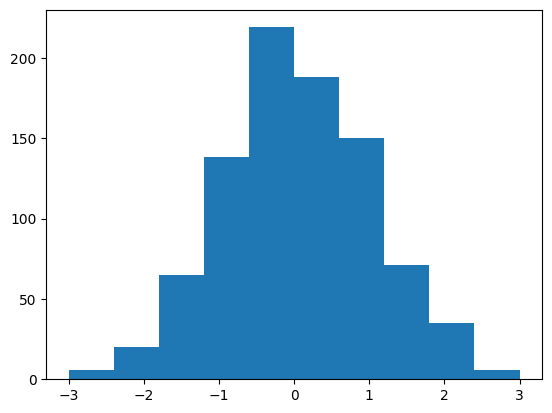

In [226]:
n = 10
m = 100
mu = 0
sigma = 1
vars = np.zeros(m)
means = np.zeros(m)
Zss = np.empty(1)
for i in range(m):
    Zs = generateNorm(mu = mu, sigma = sigma,n = n)
    Zss = np.append(Zss, Zs)
    vars[i] = np.var(Zs)
    means[i] = np.mean(Zs)
confVar = np.quantile(vars, [0.025, 0.975])
confMean = np.quantile(means, [0.025, 0.975])

print(f'Confidence interval for variance: [{np.round(confVar[0], 3)},{np.round(confVar[1], 3)}]')
print(f'Confidence interval for the mean: [{np.round(confMean[0], 3)},{np.round(confMean[1], 3)}]')
print(f'True mean is {mu}')
print(f'True variance is {sigma**2}')

# Generated values
plt.hist(Zss, range=(-3,3))


In [183]:
Zs

array([-0.28501542, -1.11937637,  1.88029023,  0.43173397, -1.3849904 ,
       -0.28501542, -1.11937637,  1.88029023,  0.43173397])

# Pareto distribution sampled from exponentials

In [ ]:
def paretoComp(mu, n = 10000):
    Xs = np.zeros(n)
    ys = generateExponential(mu, n)
    for i in range(len(Xs)):
        x = generateExponential(lam = ys[i], 1)
        Xs[i] = x
    return Xs